## Apply Inferential Statistics On White Wine Dataset
---

In this section, we will analyze the dataset to find the physiochemical attributes that are most highly correlated to the quality of wine and inference the population with those attributes. To apply inferential statistics on the dataset, we have to make an assumption that the quality ratings are trustworthy.

### Correlation analysis

To view the correlations of each attributes, we can create a correlation heat-map.

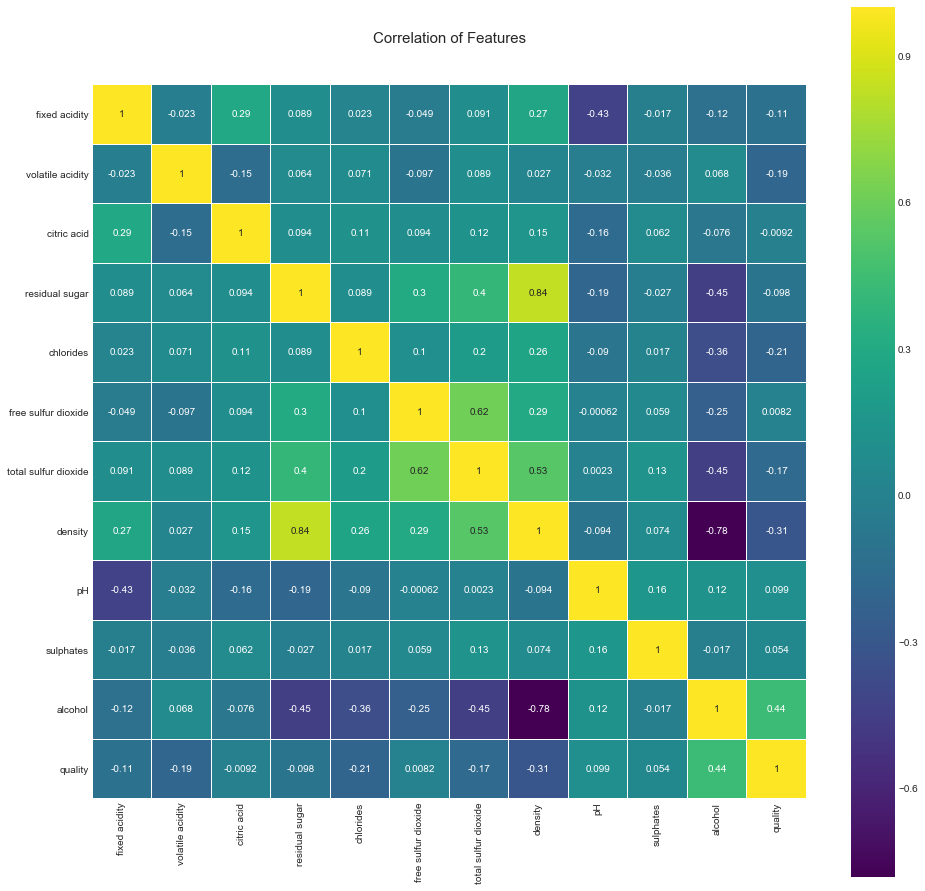

In [80]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from plotly.graph_objs import *
import seaborn as sns
import plotly.plotly as py
import plotly.tools as tls

#load the white wine quality dataset.
filename = 'winequality-white.csv' 
df = pd.read_csv(filename, sep=';')

# create a correlation heatmap
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

As we can see, there are significant positive correlation between liquid density and residual sugar, and both sulfur dioxide attributes. Alcohol level and density have strong negative correlation. These relationships are also visible in previous scatter matrix in Storytelling of the White Wine Dataset.

Overall, only alcohol level and density are the only attributes that have either positive or negative correlation above the absolute value of 0.3. Since density and alcohol level are correlated, we can say that alcohol level on its own, has the highest correlation to the quality of wine.

---

### Inferencing the dataset based on alcohol content

Since we know that alcohol content is the major factor to the quality of white wine samples, we can estimate the alcohol content of wine within each quality group by inferential statistics. 

In [81]:
#generates counts of wine samples by each quality score.
count = df.quality.value_counts().sort_index()
count

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

The counts shows that the majority of wine samples in the dataset are score between 5 and 6, which are either mediocre or ok qualities. Since they are either mediocre or just ok, we are not interested in estimate their alcohol content. Instead, the dataset will be filtered into two groups of wine, good and bad, which are defined as:

+ **good** wine are scored seven or above
+ **bad** wines are scored four or below

And inferential statistics will be applied to estimate the confidence interval of the mean and variance of the alcohol content at 95% confidence for the two groups. Because the standard deviation of the population (σ) is unknown, the confidence interval estimator of population mean (μ) is expressed as:

$\bar{x} \pm t_\frac{a}{2} \frac{s}{\sqrt{n}}\space$  where degree of freedom = n -1

And the confidence interval estimator of population variance (σ$^2$) is expressed as:

Lower confidence limit (LCL) = $\space\frac{(n-1)s^2}{X^2_\frac{a}{2}}$

Upper confidence limit (UCL) = $\space\frac{(n-1)s^2}{X^2_\left(1-\frac{a}{2}\right)}$

In [82]:
# Create datasets for good and bad wines
df_good = df[df['quality'] >= 7]
df_bad = df[df['quality'] <= 4]

# Calculate the sample size of both wines
n_good = np.sum(df_good.quality.value_counts())
n_bad = np.sum(df_bad.quality.value_counts())

print("Sample size of good quality wines:", n_good)
print("Sample size of bad quality wines:", n_bad)

Sample size of good quality wines: 1060
Sample size of bad quality wines: 183


The sample sizes of the two categories of wine are quite different. The degree of freedom of both sample set is the number of samples minus one. Therefore, the t-value of 95% confidence is 1.962 for degree of freedom around 1000, and 1.984 for degree of freedom around 100.

In [83]:
# Calculate the sample means of both wines
mean_good = np.mean(df_good['alcohol'])
mean_bad = np.mean(df_bad['alcohol'])

# Calculate the standard deviations of both wines
st_good = np.std(df_good['alcohol'])
st_bad = np.std(df_bad['alcohol'])

# Upper limit of μ 
up_mu_good = mean_good + 1.962*(st_good/(n_good**0.5))
up_mu_bad = mean_bad + 1.984*(st_bad/(n_bad**0.5))

# Lower limit of μ
lo_mu_good = mean_good - 1.962*(st_good/(n_good**0.5))
lo_mu_bad = mean_bad - 1.984*(st_bad/(n_bad**0.5))

print('Upper confidence limit of population mean of good wines:', up_mu_good)
print('Lower confidence limit of population mean of good wines:', lo_mu_good, "\n")
print('Upper confidence limit of population mean of bad wines:', up_mu_bad)
print('Lower confidence limit of population mean of bad wines:', lo_mu_bad)

Upper confidence limit of population mean of good wines: 11.491628193440514
Lower confidence limit of population mean of good wines: 11.340415831716692 

Upper confidence limit of population mean of bad wines: 10.323789955021434
Lower confidence limit of population mean of bad wines: 10.02320458049771


We can see that there is distinct difference and no overlap between the confidence intervals of good and bad quality wines.

---
The chi-squared value of the samples varies substantially depending on the sample size. With 95% confidence, the chi-squared value is 1089.531 ($X^2_\frac{a}{2}$) and 914.275 ($X^2_\left(1-\frac{a}{2}\right)$) for degree of freedom around 1000. The chi-squared value is 221.251 and 146.535 for degree of freedom at 182. 

In [84]:
# Upper limit of σ 
up_st_good = np.sqrt((n_good - 1)*st_good**2/914.275)
up_st_bad = np.sqrt((n_bad - 1)*st_bad**2/146.535)

# Lower limit of σ
lo_st_good = np.sqrt((n_good - 1)*st_good**2/1089.531)
lo_st_bad = np.sqrt((n_bad - 1)*st_bad**2/221.251)

print('Upper confidence limit of population standard deviation of good wines:', up_st_good)
print('Lower confidence limit of population standard deviation of good wines:', lo_st_good, "\n")
print('Upper confidence limit of population standard deviation of bad wines:', up_st_bad)
print('Lower confidence limit of population standard deviation of bad wines:', lo_st_bad)

Upper confidence limit of population standard deviation of good wines: 1.35027052703
Lower confidence limit of population standard deviation of good wines: 1.23691374254 

Upper confidence limit of population standard deviation of bad wines: 1.14205425576
Lower confidence limit of population standard deviation of bad wines: 0.929425962144


The chi-squared test shows that the estimated population standard deviation of alcohol content for good quality wines are between 1.24 and 1.35. And the estimate for bad quality wines are between 0.93 to 1.14. The estimated variances of wine alcohol content for both wine quality groups are virtually the same as the difference in the estimated population means of the two groups. Statistical significance is present which the mean of alcohol content in good quality wines is different to the mean of alcohol content in bad quality wines. But there is little practical significance because it is difficult to predict the quality of wine even between the two polarized quality by its alcohol content because the variance of the population is nearly as large as the difference in population means.